In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from skimage.feature import local_binary_pattern
from skimage.feature import greycoprops
from skimage.feature import greycomatrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
i = 0
def load_dataset(kelas):
    image = []
    label = []
    global i
    fld = "./dataset/"+kelas      
    if kelas=="skabies":
        f = 'skabies'
    elif kelas=="demodex":
        f = 'demodex'
    elif kelas=="sehat":
        f = 'sehat'

    for filename in os.listdir(fld):
        img = cv2.imread(fld + '/' + filename)
        image.append(img)
        label.append((i,f,filename))
        i+=1
   
    return image,label

In [3]:
def pre(data):
    arr_prep = []
    for i in range(len(data)):
        image_rgb = cv2.cvtColor(data[i], cv2.COLOR_BGR2GRAY)
        arr_prep.append(image_rgb)
    return arr_prep

In [4]:
def Sharpening(data):
    arr_sharp = []
    for i in range(len(data)):
        sharpen = np.array([[-1,-1,-1],[-1, 9,-1],[-1,-1,-1]])
        imgsharp = cv2.filter2D(data[i],-1,sharpen)
        arr_sharp.append(imgsharp)
    return arr_sharp

In [5]:
def clahe(data):
    arr_clahe = []
    for i in range(len(data)):
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        cl1 = clahe.apply(data[i])
        arr_clahe.append(cl1)
    return arr_clahe

In [6]:
def extractLBP(p,r,img):
    
    n_points = p
    radius = r
    
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))
    hist = hist.astype("float")                         
    hist /= (hist.sum() + (1e-7))
    return hist
def featureExtraction(p,r,arr):
    arr_feature=[]
    for i in range(np.shape(arr)[0]):
        arr_feature.append(extractLBP(p,r,arr[i]))
    return arr_feature

In [7]:
skabies,l_skabies = load_dataset("skabies")
lain,l_lain = load_dataset("demodex")

In [8]:
pre_skabies = pre(skabies)
pre_lain = pre(lain)

In [9]:
combineImage = np.concatenate((pre_skabies,pre_lain ))
combineLabel = np.concatenate((l_skabies,l_lain ))

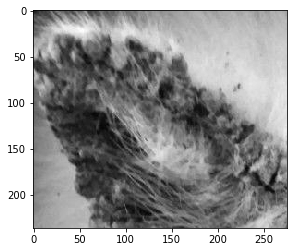

In [10]:
plt.imshow(pre_skabies[0], cmap="gray")

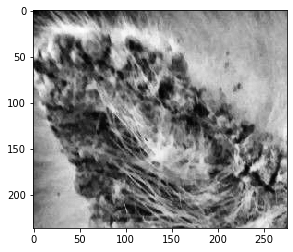

In [11]:
pre_train = clahe(combineImage)
plt.imshow(pre_train[0], cmap="gray")
plt.show()
pre_train = Sharpening(pre_train)

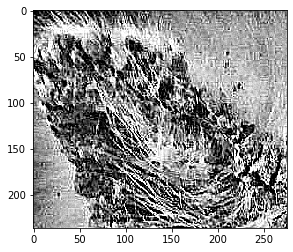

In [12]:
plt.imshow(pre_train[0], cmap="gray")

In [20]:
X_train, X_test, y_train, y_test = train_test_split(pre_train, combineLabel, test_size=0.4, random_state=100)

In [21]:
f_train = featureExtraction(16,1,X_train)
f_test = featureExtraction(16,1,X_test)

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap = True, 
                             max_depth = 15,
                             min_samples_leaf = 2,
                             min_samples_split = 2, 
                             n_estimators = 300)
clf.fit(f_train, y_train[:,1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
result = clf.predict(f_test)

In [24]:
print(result)

['skabies' 'demodex' 'demodex' 'demodex' 'skabies' 'demodex' 'demodex'
 'skabies' 'skabies' 'skabies' 'skabies' 'demodex' 'skabies' 'demodex'
 'skabies' 'demodex' 'demodex' 'demodex' 'skabies' 'demodex' 'demodex'
 'skabies' 'demodex' 'skabies' 'demodex' 'skabies' 'skabies' 'skabies'
 'skabies' 'skabies' 'skabies' 'demodex' 'demodex' 'demodex' 'skabies'
 'skabies' 'demodex' 'demodex' 'demodex' 'skabies' 'demodex' 'skabies'
 'demodex' 'demodex' 'demodex' 'skabies' 'demodex' 'demodex' 'skabies'
 'demodex' 'demodex' 'demodex' 'skabies' 'skabies' 'skabies' 'demodex'
 'skabies' 'demodex' 'demodex' 'demodex' 'skabies' 'demodex' 'demodex'
 'demodex' 'skabies' 'skabies' 'skabies' 'skabies' 'skabies' 'skabies'
 'skabies' 'demodex' 'demodex' 'skabies' 'skabies' 'demodex' 'skabies'
 'demodex' 'demodex' 'demodex' 'demodex' 'skabies' 'skabies' 'demodex'
 'demodex' 'demodex' 'demodex' 'skabies' 'demodex' 'demodex' 'skabies'
 'demodex' 'demodex' 'skabies']


In [26]:
# print(clf)
import pickle
#buat save model
f = "modelULBP.pkl"
with open(f, 'wb') as file:
    pickle.dump(clf, file)
import numpy as np
# model.predict(np.expand_dims(img, axis=0))

In [27]:
import pickle
# buat load
f =  "modelULBP.pkl"
with open(f, 'rb') as file:
    m = pickle.load(file)

In [30]:
import numpy as np
m.predict(np.expand_dims(f_test[0], axis=0))

array(['skabies'], dtype='<U131')